<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Alphas/Retail_Crypto_Universe_Return_by_Ticker_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from my_library import *

14:18:05 Starting...
14:18:05 Installing yfinance into Google notebook...
14:18:18 Installing arch into Google notebook...
14:18:27 Initialized.


In [ ]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=list(map(lambda x:x.replace("-USD",""),data.columns.droplevel(1)))
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
display(data)

Return (%),AAVE,ADA,ARB,AVAX,BCH,BONK,BTC,COMP,DOGE,ETC,...,PNUT,POPCAT,SHIB,SOL,TRUMP,UNI,WIF,XLM,XRP,XTZ
UTC Date,,,,,,,,,,,,,,,,,,,,,
2024-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-08,NaN,NaN,NaN,NaN,NaN,NaN,1.448534,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-09,NaN,NaN,NaN,NaN,NaN,NaN,2.348370,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-10,NaN,NaN,NaN,NaN,NaN,NaN,-0.402624,NaN,0.477437,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-11,NaN,NaN,NaN,NaN,2.013289,NaN,-0.655153,NaN,-1.226744,-1.542857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-18,4.467709,2.314781,5.042404,3.867112,3.498362,11.756720,3.149721,5.187419,8.580249,3.171661,...,18.223749,11.850659,5.813953,4.351120,4.621688,7.068841,14.355821,2.078920,3.157799,3.876386
2025-05-19,6.443445,-2.295334,-0.762880,-3.389058,-3.282590,-4.154519,-0.764352,-4.829850,-3.724915,-0.944054,...,-2.975321,-9.171970,-2.830503,-3.682969,-2.749390,-3.154751,-6.883488,-2.010943,-1.993209,-3.281587
2025-05-20,5.026192,0.477961,0.433240,1.575605,0.326137,1.571610,1.162133,-0.429612,0.733036,-0.567034,...,-5.438056,3.969475,0.137080,1.077644,11.987591,1.558737,-1.797992,0.319066,-0.983279,1.492341


14:18:31 Wrote figure to 'Cumulative Return for Retail Cryptocurrency Sample.png'.


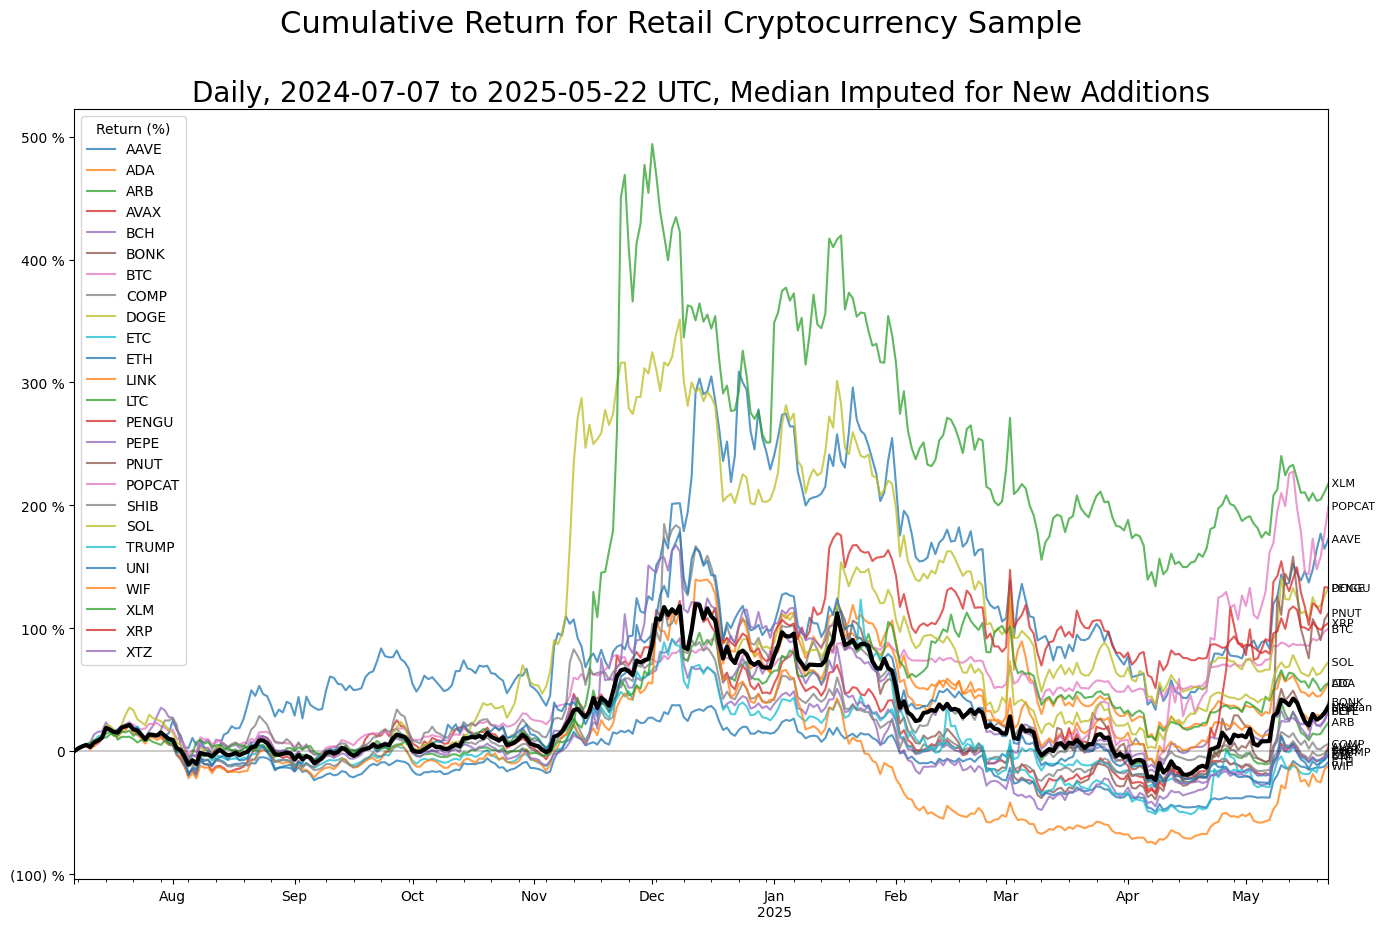

In [ ]:
factor=(one+data/hundred)

for k,v in sorted(zip((s:=factor.apply(lambda x:x.first_valid_index()-1)).values,s.index),key=lambda x:x[0]):
    factor.loc[k,v]=m if not np.isnan(m:=factor.cumprod().loc[k].median()) else one

factor=factor.cumprod()*hundred-hundred
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
factor.plot(ax=plot,alpha=0.75)
factor['Median']=factor.median(axis=1)
factor['Median'].plot(ax=plot,color='black',linewidth=3)

plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Cumulative Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC, Median Imputed for New Additions" % (factor.index[0],factor.index[-1]),fontsize=20)

for c in factor:
    plot.text(x:=factor.index[-1],y:=factor.loc[x,c]," "+c,fontsize=8,ha='left',va='center')

figure.savefig(filename:=title+(filetype:='.png'),dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

14:20:41 Rank Correlation for 'Useful' Coins: SignificanceResult(statistic=np.float64(-0.5735294117647058), pvalue=np.float64(0.020191038046523092))


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,Symbol Rank,Meme Coin
Return (%),,,,,,,,
AAVE,0.478249,0.784532,5.322238,70,0.636129,1.233290,1,0.0
ADA,0.138190,0.271083,4.168528,70,0.498234,0.544087,2,0.0
ARB,0.502190,0.461474,5.725293,70,0.684303,0.674370,3,0.0
AVAX,0.237914,0.557059,4.878319,70,0.583071,0.955388,4,0.0
BCH,0.176515,0.479266,4.035612,70,0.482348,0.993610,5,0.0
BTC,0.234828,0.479105,2.431325,70,0.290599,1.648682,7,0.0
COMP,-0.107097,0.238776,4.107076,70,0.490889,0.486414,8,0.0
ETC,-0.118930,0.191192,3.629212,70,0.433774,0.440763,10,0.0
ETH,0.015556,0.613377,4.676454,70,0.558943,1.097386,11,0.0


14:20:41
OLS Regression for 'Useful' Coins
                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     7.263
Date:                Thu, 22 May 2025   Prob (F-statistic):             0.0174
Time:                        14:20:41   Log-Likelihood:                 6.3653
No. Observations:                  16   AIC:                            -8.731
Df Residuals:                      14   BIC:                            -7.186
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const  

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,Symbol Rank,Meme Coin,Linear Model
Return (%),,,,,,,,,
AAVE,0.478249,0.784532,5.322238,70,0.636129,1.233290,1,0.0,0.568849
ADA,0.138190,0.271083,4.168528,70,0.498234,0.544087,2,0.0,0.543451
ARB,0.502190,0.461474,5.725293,70,0.684303,0.674370,3,0.0,0.518052
AVAX,0.237914,0.557059,4.878319,70,0.583071,0.955388,4,0.0,0.492653
BCH,0.176515,0.479266,4.035612,70,0.482348,0.993610,5,0.0,0.467255
BONK,0.210342,1.370158,7.948144,70,0.949985,1.442294,6,1.0,NaN
BTC,0.234828,0.479105,2.431325,70,0.290599,1.648682,7,0.0,0.441856
COMP,-0.107097,0.238776,4.107076,70,0.490889,0.486414,8,0.0,0.416457
DOGE,0.066216,0.671671,5.237182,70,0.625963,1.073020,9,1.0,NaN


14:20:42 Wrote figure to 'Mean Return for Retail Cryptocurrency Sample.png'.


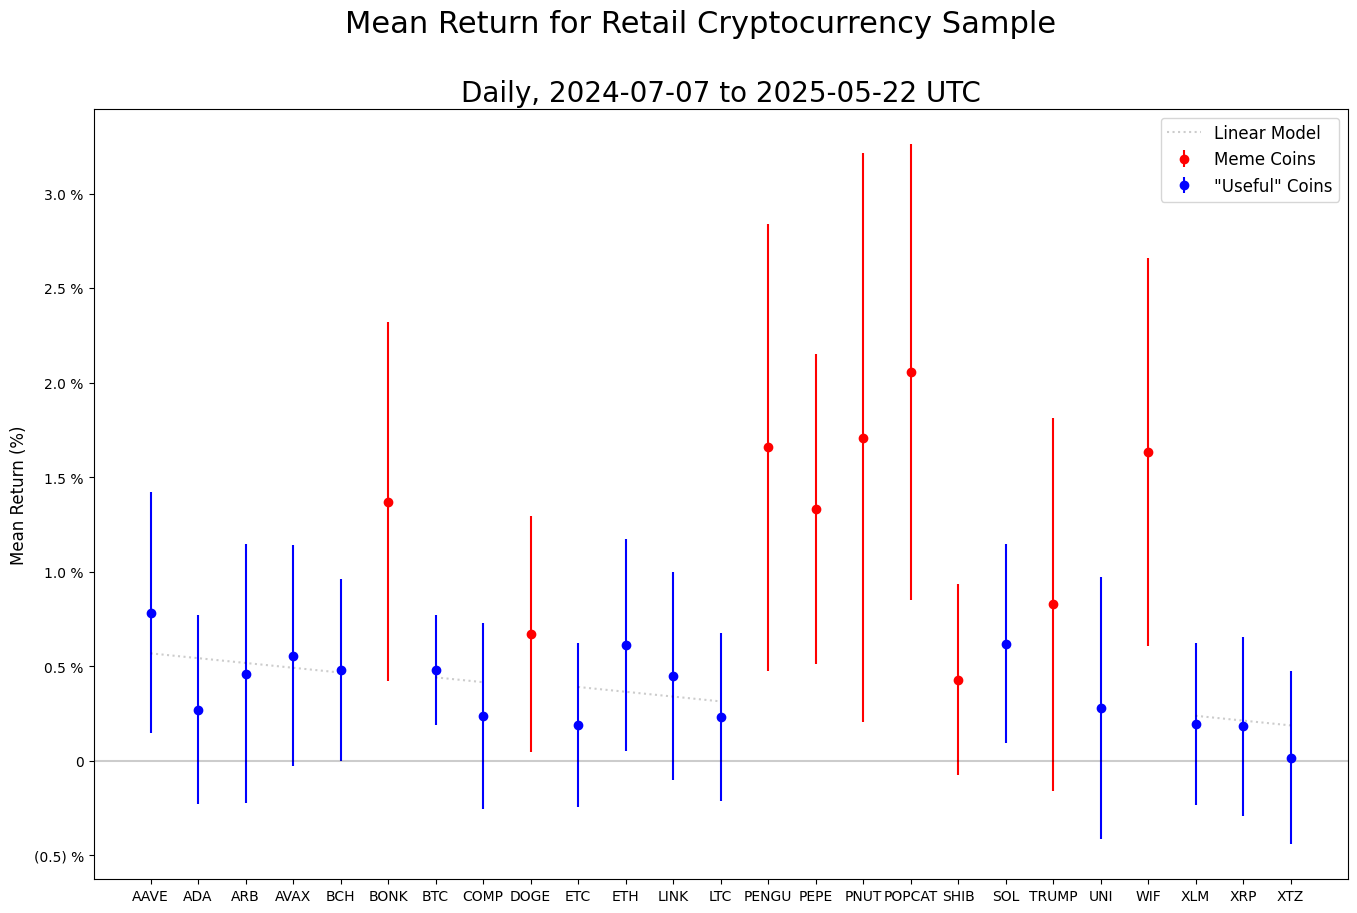

In [ ]:
from scipy.stats import spearmanr
from statsmodels.api import OLS
from statsmodels.tools import add_constant

report=pd.DataFrame({
    "Median":(design:=data.dropna(axis=0).sort_index()).median(), # sort index not needed, but let's do it anyway
    "Mean":(m:=design.mean()),
    "Std.Dev.":design.std(),
    "Sample":design.count(),
    "Std.Err.":(e:=design.std()/np.sqrt(design.count())),
    "t Statistic":m/e,
    "Symbol Rank":list(range(1,m.index.shape[0]+1)),
    "Meme Coin":[one if t in "BONK,DOGE,PENGU,PEPE,PNUT,POPCAT,SHIB,TRUMP,WIF" else zero for t in m.index]
})

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=report.index,y:=report["Mean"],alpha=0,label=None)
plot.errorbar(x:=report[report["Meme Coin"]==one].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Red",label='Meme Coins')
plot.errorbar(x:=report[report["Meme Coin"]==zero].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Blue",label='"Useful" Coins')
nprint("Rank Correlation for 'Useful' Coins:",spearmanr(x,y))

design=report.loc[u:=x];display(design)
design["Symbol Rank"]=list(range(1,design.index.shape[0]+1))
fit=OLS(y:=design["Mean"],add_constant(x:=design["Symbol Rank"])).fit()
nprint("OLS Regression for 'Useful' Coins",fit.summary(),sep="\n")
report.loc[design.index,"Linear Model"]=fit.predict()
display(report)

plot.plot(x:=report.index,y:=report["Linear Model"],':',color='black',alpha=0.2,label="Linear Model")
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Mean Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC" % (data[u].index[0],data[u].index[-1]),fontsize=20)
plot.yaxis.set_major_formatter(PercentLabels(1))
plot.set_ylabel("Mean Return (%)",fontsize=12)
plot.legend(fontsize=12)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

In [ ]:
from warnings import catch_warnings,simplefilter

nprint("Fitting AR(1)-AGARCH(1,1) Model with GED Innovations...")

design=data[report[report["Meme Coin"]==zero].index].dropna()
results=pd.DataFrame(index=design.columns)

for ticker in tqdm(design.columns):
    model=ARX(design[ticker],lags=[1])
    model.volatility = GARCH2(1,0,1)
    model.distribution = GeneralizedError2()

    with catch_warnings():
        simplefilter("ignore")
        ged_model=model.fit(update_freq=0,disp='Off',options={'maxiter':1000})

        if ged_model.convergence_flag==0:
            for field in "Estimate","Std.Err.":
                results.loc[ticker,"Drift,%s" % field]=(g:=ged_model.params if field=="Estimate" else ged_model.std_err)["Const"]
                results.loc[ticker,"Return,%s" % field]=g[ticker+"[1]"]
                results.loc[ticker,"C,%s" % field]=g["omega"]
                results.loc[ticker,"A,%s" % field]=g["alpha[1]"]
                results.loc[ticker,"B,%s" % field]=g["beta[1]"]
                results.loc[ticker,"nu,%s" % field]=g["nu"]

results.columns=pd.MultiIndex.from_tuples(list(map(lambda x:tuple(x.split(",")),results.columns)))
spearman=pd.DataFrame(index=(lambda x:dict.fromkeys(x).keys())(results.columns.get_level_values(0)))
results.sort_index(axis=1,inplace=True)
display(results)


for estimator in spearman.index:
    spearman.loc[estimator,"Rank Correlation"]=(R:=spearmanr(x:=results.index,y:=results.xs("Estimate",axis=1,level=1)[estimator])).statistic
    spearman.loc[estimator,"p Value"]=R.pvalue

display(spearman)

16:34:41 Fitting AR(1)-AGARCH(1,1) Model with GED Innovations...


  0%|          | 0/16 [00:00<?, ?it/s]

A                       B                        C  \
            Estimate      Std.Err.  Estimate      Std.Err.   Estimate   
Return (%)                                                              
AAVE        0.003364  6.481227e-02  0.491991  1.483256e+00  13.555603   
ADA         0.109670  1.401460e-01  0.634551  1.771246e-01   4.842006   
ARB         0.123284  1.008416e-01  0.629201  8.303089e-02   7.966957   
AVAX       -0.164751  2.359241e-10  1.130176  1.618139e-09   1.534103   
BCH         0.092606  1.177478e-01  0.607091  8.707179e-02   5.240499   
BTC        -0.122413  1.003635e-07  1.110190  9.153606e-07   0.222348   
COMP        0.048188  8.774445e-02  0.746009  1.026662e-01   3.550834   
ETC         0.090066  6.218261e-02  0.341371  3.230457e-01   8.145854   
ETH         0.360785  2.233170e-01  0.313918  4.647974e-01   9.871542   
LINK       -0.123304  1.707832e-13  1.106827  2.632484e-10   0.606588   
LTC         0.046982  1.060084e-01  0.613156  1.338041e-01   4.759733   
SOL         0.047960  1.192449e-01  0.811550  1.672264e-01   2.663951   
UNI         0.202912  2.737691e-01  0.432625  9.415373e-01  14.634049   
XLM         0.095694  1.074187e-01  0.550730  9.480034e-02   4.776494   
XRP         0.190013  1.873442e-01  0.602777  1.254984e-01   4.041906   
XTZ         0.082078  1.143415e-01  0.473132  7.960586e-01   7.385196   

                             Drift              Return                  nu  \
                Std.Err.  Estimate  Std.Err.  Estimate  Std.Err.  Estimate   
Return (%)                                                                   
AAVE        4.391481e+01 -0.024485  0.488042 -0.153943  0.138079  1.247123   
ADA         3.507003e+00 -0.277741  0.846337 -0.193929  0.296382  1.081562   
ARB         4.202363e+00  0.465972  0.000161  0.048129  0.000025  0.931813   
AVAX        3.200181e-09 -0.429376  0.014911 -0.044866  0.005590  2.439692   
BCH         1.862878e+00  0.111996  0.002896 -0.070639  0.000652  1.181323   
BTC         1.996448e-08  0.320945  0.003876 -0.061637  0.026852  1.828615   
COMP        2.018652e+00 -0.154108  0.517862 -0.040451  0.183203  1.300436   
ETC         5.193440e+00 -0.259730  0.000283 -0.112323  0.000487  1.055611   
ETH         1.075809e+01  0.089000  0.000080 -0.191946  0.000259  0.641163   
LINK        1.684972e-03 -0.274924  0.006620 -0.042756  0.000279  2.101357   
LTC         2.420288e+00  0.070846  0.388939 -0.169372  0.063371  1.086175   
SOL         3.261159e+00  0.104176  1.000087 -0.058305  0.292802  1.186219   
UNI         3.036556e+01 -0.613898  0.000318 -0.165210  0.000160  0.678189   
XLM         2.378007e+00 -0.018896  0.404118 -0.088324  0.142784  1.397646   
XRP         2.414529e+00 -0.121610  0.000027  0.068548  0.000026  0.859256   
XTZ         1.454808e+01  0.436133  0.007610  0.037053  0.001860  0.978574   

                      
            Std.Err.  
Return (%)            
AAVE        0.263452  
ADA         0.627535  
ARB         0.215128  
AVAX        0.003238  
BCH         0.294717  
BTC         0.070397  
COMP        0.313120  
ETC         0.216632  
ETH         0.144798  
LINK        0.000971  
LTC         0.244731  
SOL         0.422731  
UNI         0.193392  
XLM         0.247834  
XRP         0.194395  
XTZ         0.232058

,Rank Correlation,p Value
Drift,0.064706,0.811821
Return,0.229412,0.392720
C,-0.067647,0.803420
A,0.241176,0.368207
B,-0.320588,0.226045
nu,-0.276471,0.299942
